# Transform images with PIL operations


## Problem

You need to resize, rotate, crop, or convert hundreds of images—and keep track of all the transformed versions.


## Solution

**What's in this recipe:**
- Basic image operations (resize, rotate, flip, crop)
- Track image properties
- Iterate on transformations before adding to your table

Apply PIL transformations (resize, rotate, flip, crop) to images stored as rows in your table. Uses Pixeltable's built-in image functions—common operations that work directly on image columns.

Using Pixeltable, iterate on transformations before adding them to your table. Use `.select()` to define what you want, then `.collect()` to execute and see results (or `.head(n)` to see just the first n rows). Nothing is stored in your table. Once you're satisfied, use `.add_computed_column()` with the same expression to persist results.

For more on this workflow, see [Get fast feedback on transformations](./dev-iterative-workflow.ipynb).


### Setup


In [ ]:
%pip install -qU pixeltable

In [1]:
import pixeltable as pxt

### Load images


In [2]:
# Create a fresh directory (drop existing if present)
pxt.drop_dir('image_demo', force=True)
pxt.create_dir('image_demo')

Connected to Pixeltable database at: postgresql+psycopg://postgres:@/pixeltable?host=/Users/alison-pxt/.pixeltable/pgdata
Created directory 'image_demo'.


In [3]:
t = pxt.create_table('image_demo.images', {'image': pxt.Image})
t.insert([
    {'image': 'https://raw.githubusercontent.com/pixeltable/pixeltable/main/docs/resources/images/000000000001.jpg'},
    {'image': 'https://raw.githubusercontent.com/pixeltable/pixeltable/main/docs/resources/images/000000000016.jpg'},
])

Created table 'images'.
Inserting rows into `images`: 2 rows [00:00, 855.81 rows/s]
Inserted 2 rows with 0 errors.


2 rows inserted, 4 values computed.

### Iterate: Check image properties for a few images first

Use `.select()` to define the transformation, then `.head(n)` to execute and see just the first n rows. `.head(n)` is a special version of `.collect()` that limits results. Nothing is stored in your table.

Pixeltable includes these built-in functions for image properties:
- `.height` - Get image height in pixels
- `.width` - Get image width in pixels
- `.mode` - Get color mode (RGB, RGBA, L for grayscale, etc.)


image,height,width,mode
,480,640,RGB
,640,480,RGB

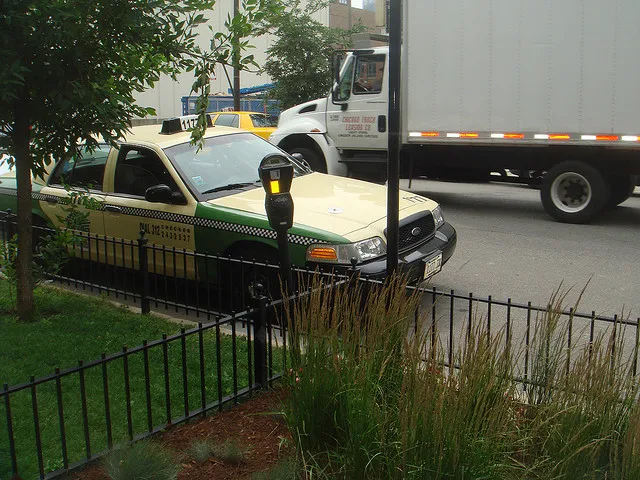
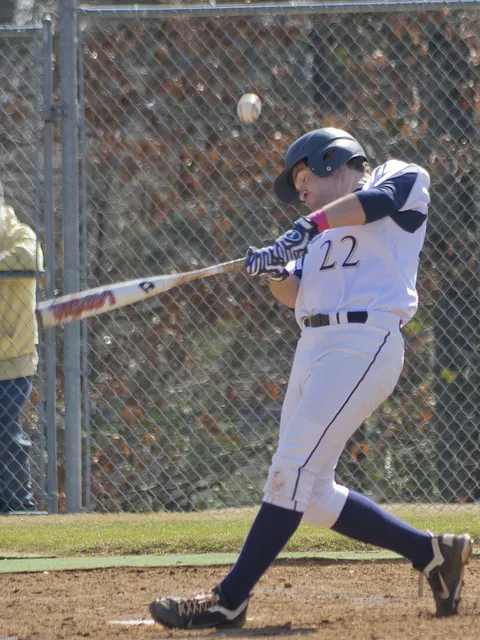

In [4]:
# Preview the properties
t.select(t.image, t.image.height, t.image.width, t.image.mode).collect()

### Add: Check image properties for all images in your table


Added 2 column values with 0 errors.
Added 2 column values with 0 errors.
Added 2 column values with 0 errors.


image,height,width,mode
,480,640,RGB
,640,480,RGB

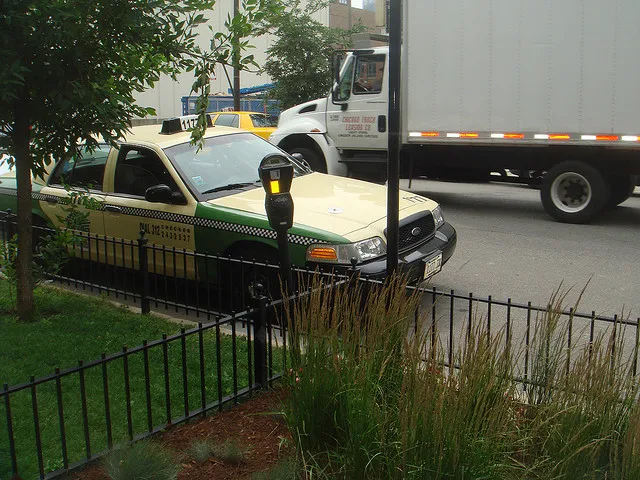
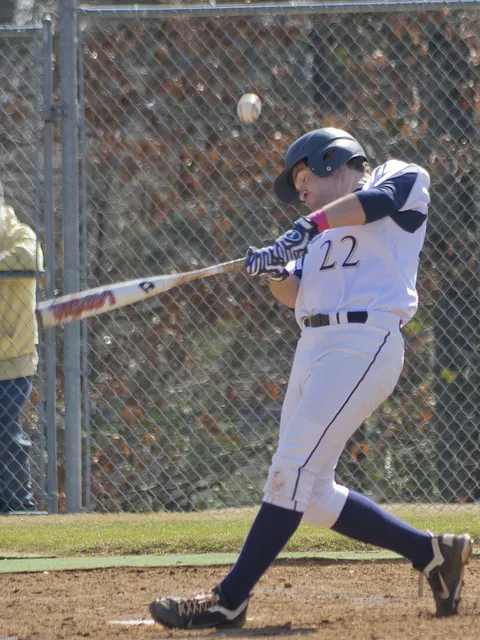

In [5]:
# Save as computed columns
t.add_computed_column(height=t.image.height)
t.add_computed_column(width=t.image.width)
t.add_computed_column(mode=t.image.mode)  # RGB, RGBA, L (grayscale), etc.

t.collect()



### Iterate: Resize a few images first

Use `.select()` to define the transformation, then `.head(n)` to execute and see just the first n rows. `.head(n)` is a special version of `.collect()` that limits results. Nothing is stored in your table.

Pixeltable includes a built-in function for resizing image files with PIL:

- `.resize(width, height)` - Change image dimensions

image,resize
,

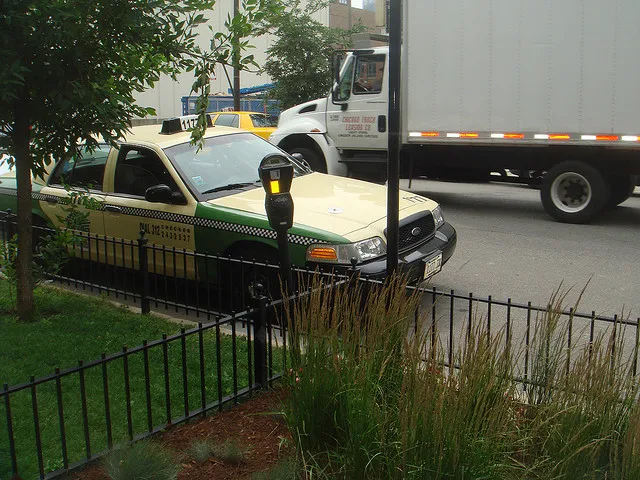
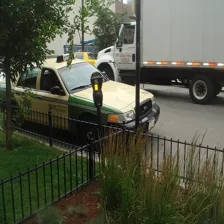

In [6]:
# Preview the resize operation
t.select(t.image, t.image.resize((224, 224))).head(1)

### Add: Resize all images in your table

Once you're satisfied with the results, use `.add_computed_column()` with the same expression. This processes all rows and stores the results permanently in your table.


Added 2 column values with 0 errors.


image,height,width,mode,resized
,480,640,RGB,
,640,480,RGB,

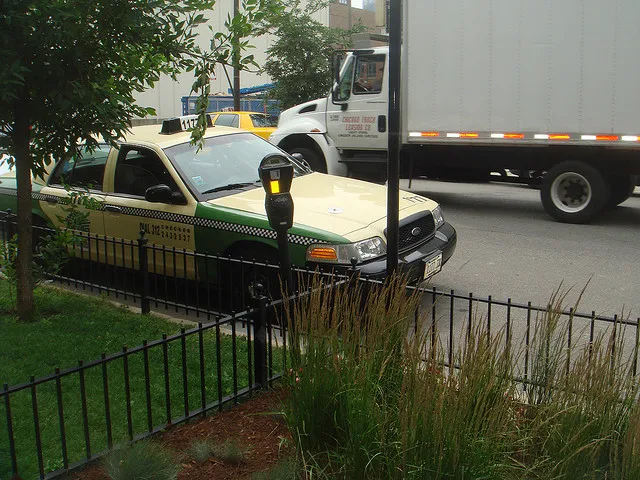
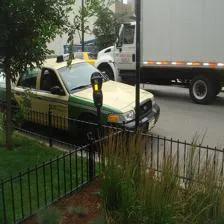
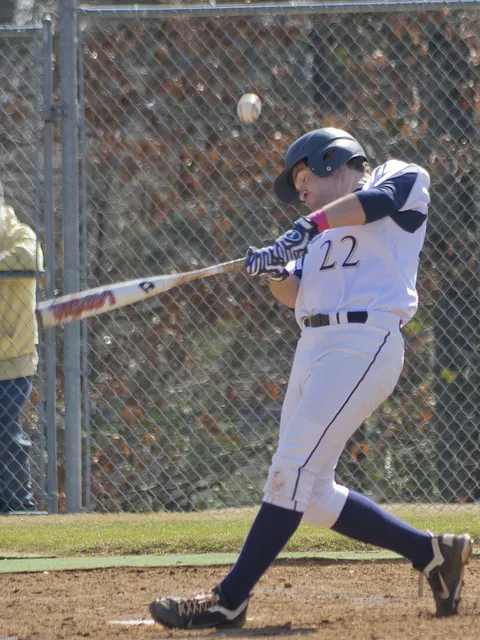
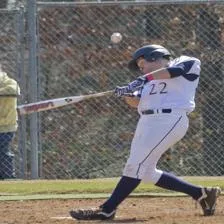

In [7]:
# Save as computed column
t.add_computed_column(resized=t.image.resize((224, 224)))

t.collect()

### Iterate: Rotate a few images first

Use `.select()` to define the transformation, then `.head(n)` to execute and see just the first n rows. `.head(n)` is a special version of `.collect()` that limits results. Nothing is stored in your table.

Pixeltable includes a built-in function for rotating image files with PIL:

- `.rotate(degrees)` - Rotate image by specified degrees

image,rotate
,

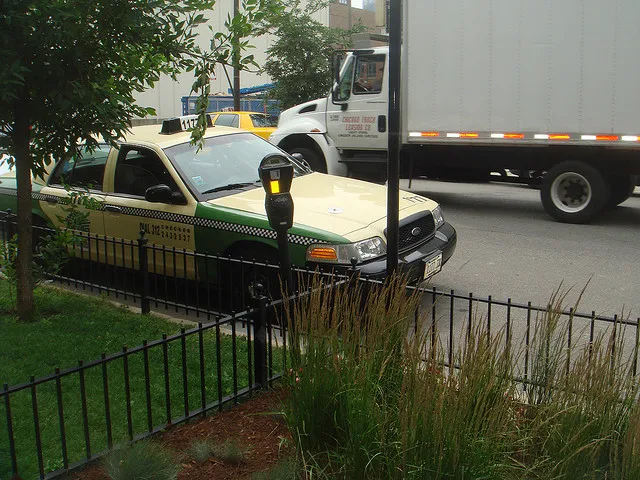
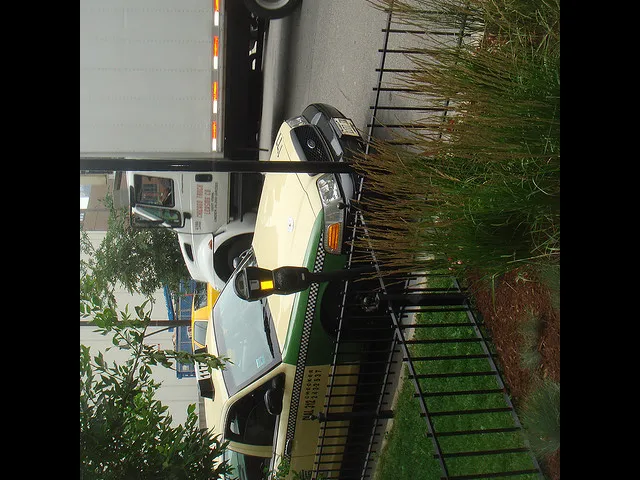

In [8]:
# Query: Preview the rotation
t.select(t.image, t.image.rotate(90)).head(1)

### Add: Rotate all images in your table

Once you're satisfied with the results, use `.add_computed_column()` with the same expression. This processes all rows and stores the results permanently in your table.


Added 2 column values with 0 errors.


image,height,width,mode,resized,rotated
,480,640,RGB,,
,640,480,RGB,,

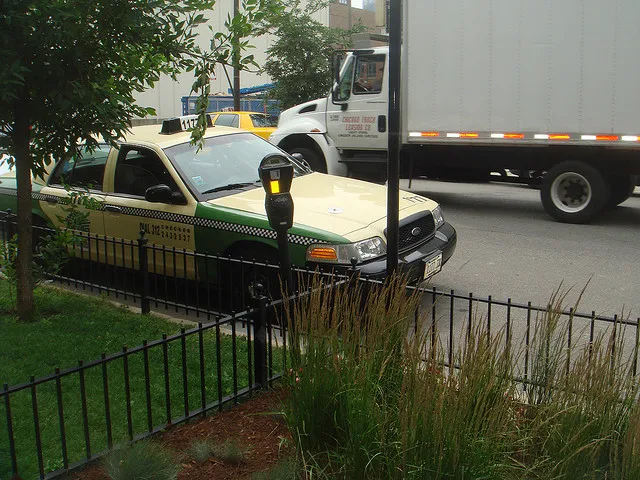
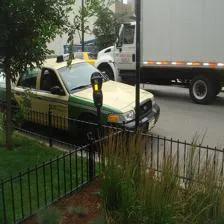
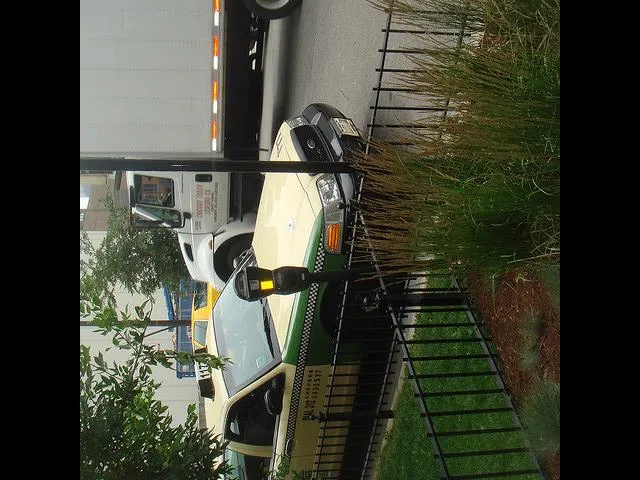
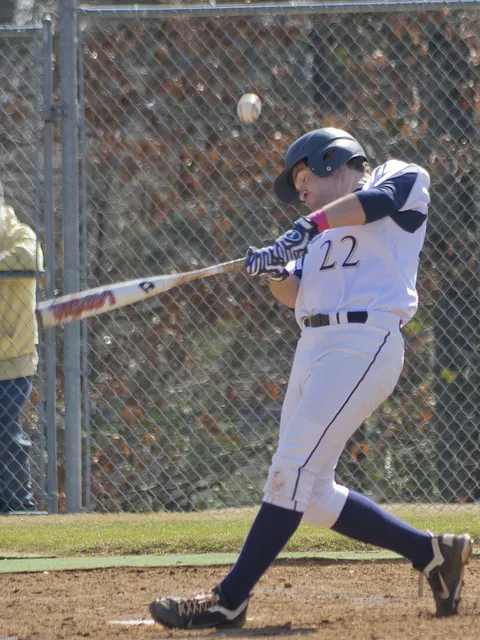
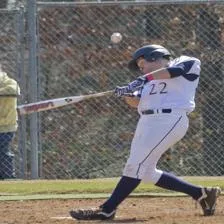
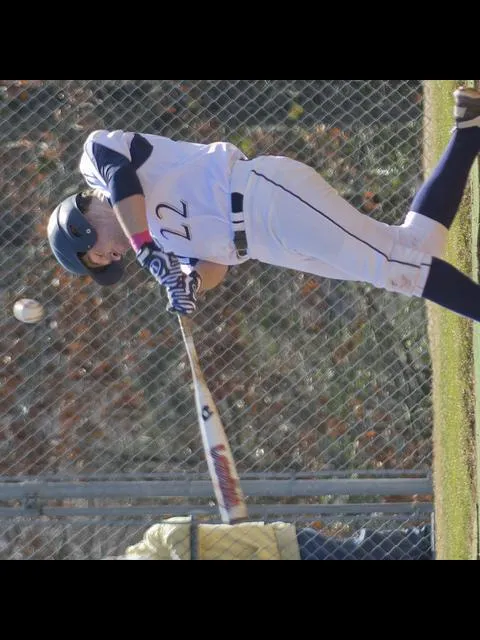

In [9]:
# Save as computed column
t.add_computed_column(rotated=t.image.rotate(90))

t.collect()


### Iterate: Flip a few images first

Use `.select()` to define the transformation, then `.head(n)` to execute and see just the first n rows. `.head(n)` is a special version of `.collect()` that limits results. Nothing is stored in your table.

Pixeltable includes a built-in function for transposing image files with PIL (note that for this transform you will need import PIL to access the `FLIP_*` constants):

- `.transpose(Image.FLIP_TOP_BOTTOM)` - Flip image vertically
- `.transpose(Image.FLIP_LEFT_RIGHT)` - Mirror image horizontally

image,transpose,transpose_1
,,

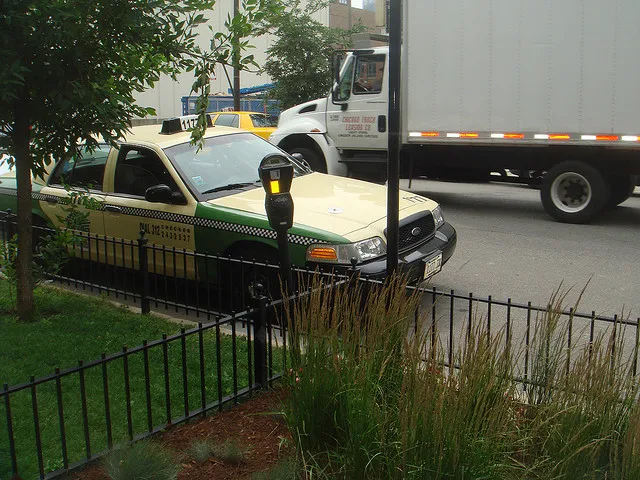
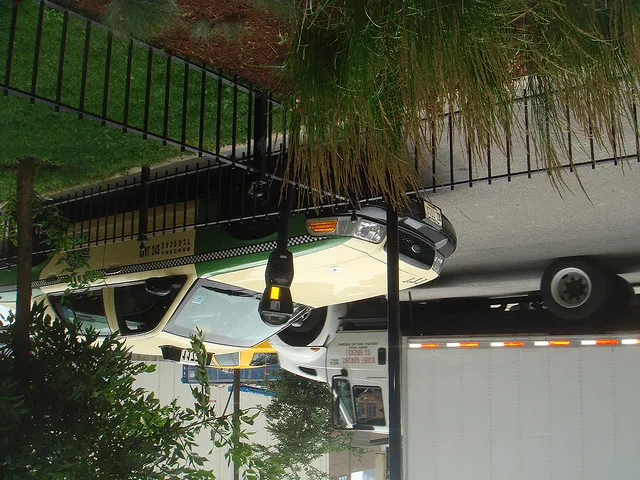
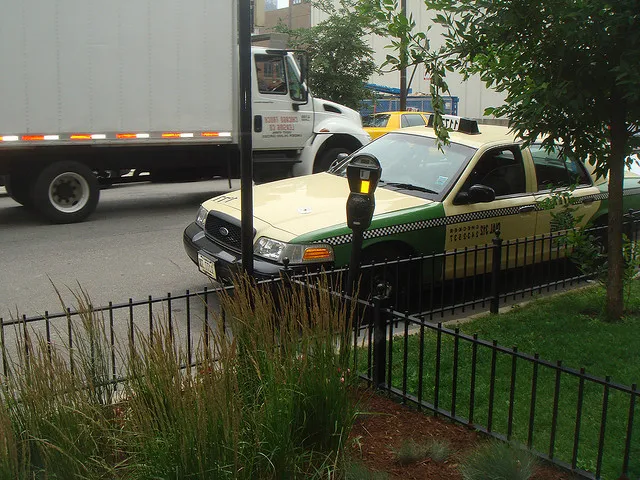

In [10]:
# Import PIL Image to access flip constants
from PIL import Image

# Preview both flip operations
t.select(
    t.image, 
    t.image.transpose(Image.FLIP_TOP_BOTTOM),
    t.image.transpose(Image.FLIP_LEFT_RIGHT)
).head(1)

### Add: Flip all images in your table

Once you're satisfied with the results, use `.add_computed_column()` with the same expression. This processes all rows and stores the results permanently in your table.


Added 2 column values with 0 errors.
Added 2 column values with 0 errors.


image,flip_v,flip_h
,,
,,

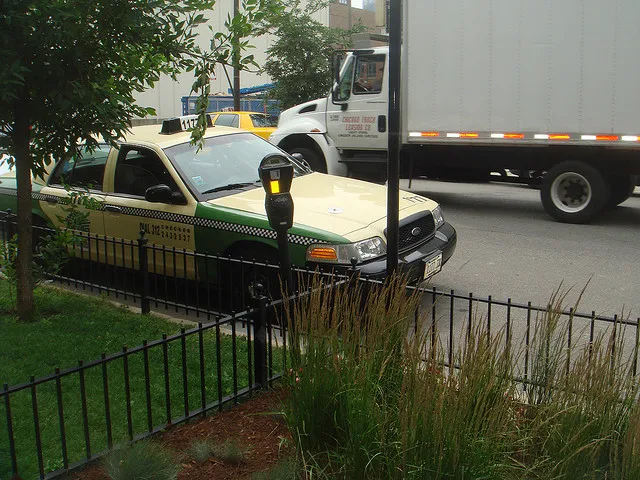
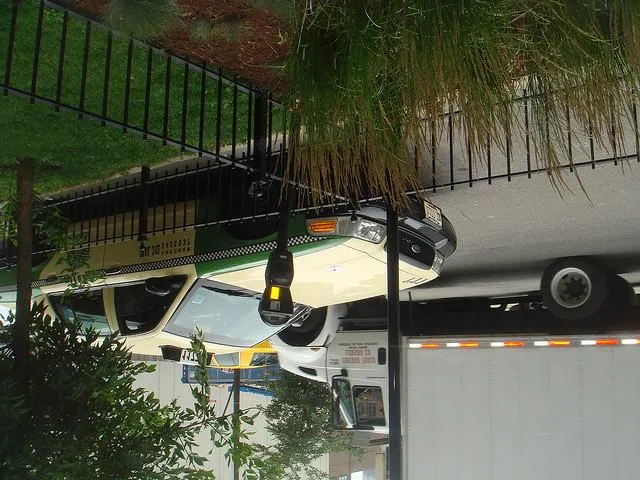
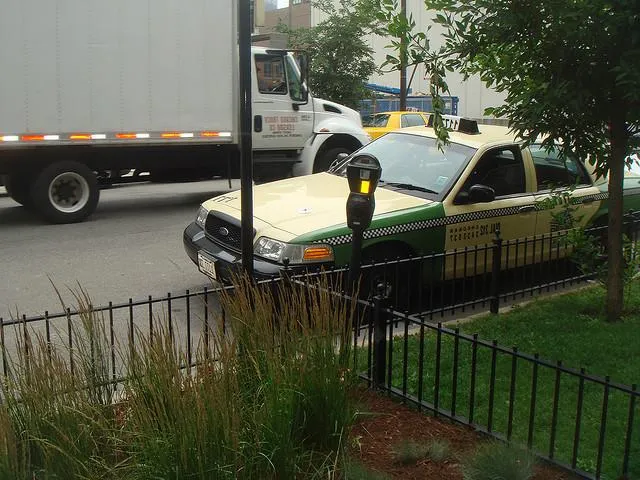
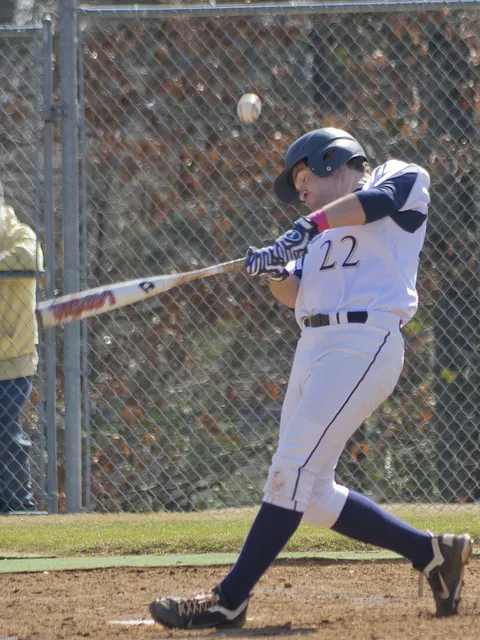
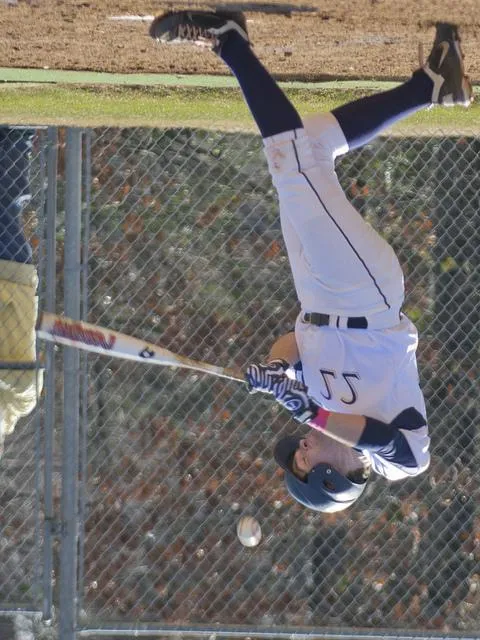
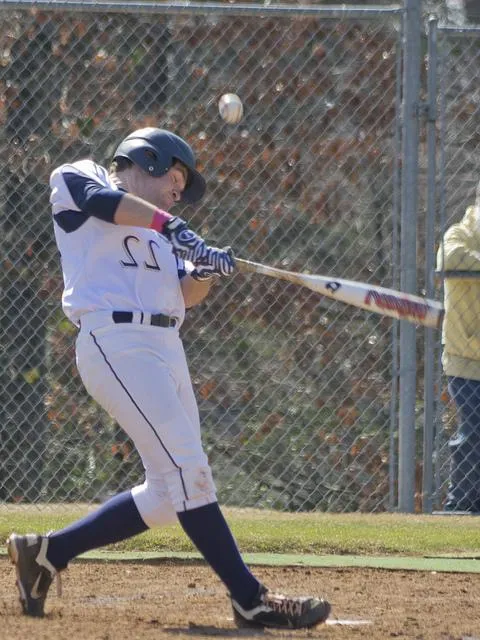

In [11]:
# Save as computed columns
# Flip vertically (top to bottom)
t.add_computed_column(flip_v=t.image.transpose(Image.FLIP_TOP_BOTTOM))

# Flip horizontally (left to right, mirror effect)
t.add_computed_column(flip_h=t.image.transpose(Image.FLIP_LEFT_RIGHT))

# Here we use select to just select columns to view
t.select(t.image, t.flip_v, t.flip_h).collect()

### Iterate: Crop a few images first

Use `.select()` to define the transformation, then `.head(n)` to execute and see just the first n rows. `.head(n)` is a special version of `.collect()` that limits results. Nothing is stored in your table.

Pixeltable includes a built-in function for cropping image files with PIL:

- `.crop(box)` - Extract a rectangular region from the image (box format: `(left, top, right, bottom)`)

image,crop
,

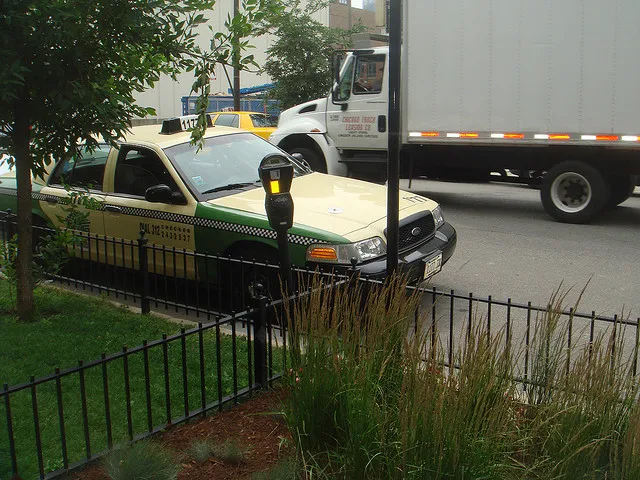
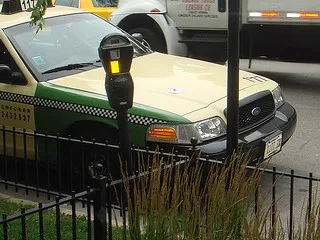

In [12]:
# Preview the center crop
# Box format: (left, top, right, bottom)
t.select(
    t.image,
    t.image.crop((
        t.image.width // 4,
        t.image.height // 4,
        3 * t.image.width // 4,
        3 * t.image.height // 4
    ))
).head(1)

### Add: Crop all images in your table

Once you're satisfied with the results, use `.add_computed_column()` with the same expression. This processes all rows and stores the results permanently in your table.

Added 2 column values with 0 errors.


center_crop
""
""

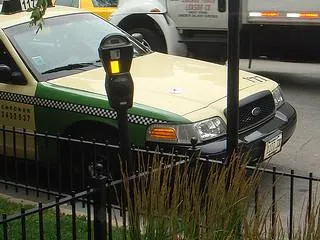
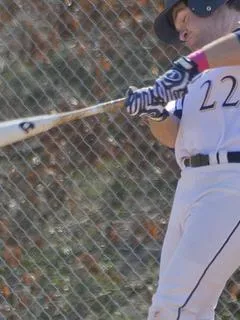

In [13]:
# Save as computed column
t.add_computed_column(
    center_crop=t.image.crop((
        t.image.width // 4,
        t.image.height // 4,
        3 * t.image.width // 4,
        3 * t.image.height // 4
    ))
)

t.select(t.center_crop).collect()

## Explanation

**How PIL transformations work in Pixeltable:**

Pixeltable provides built-in functions that wrap PIL (Pillow) operations for image manipulation. These functions work directly on image columns in your table—no need to write loops or manage file I/O. When you call `.resize()`, `.rotate()`, or other methods on an image column, Pixeltable handles applying the transformation to each image automatically.

All these transformations use standard PIL operations under the hood. For more details on PIL functionality, see the [Pillow documentation](https://pillow.readthedocs.io/).

**To customize transformations:**

- **Resize**: Change dimensions with `.resize((width, height))` - specify target size in pixels
- **Rotate**: Rotate counterclockwise with `.rotate(degrees)` - use negative values for clockwise rotation
- **Flip**: Use `.transpose(Image.FLIP_LEFT_RIGHT)` for horizontal mirror or `.transpose(Image.FLIP_TOP_BOTTOM)` for vertical flip
- **Crop**: Extract regions with `.crop((left, top, right, bottom))` - coordinates are in pixels from top-left origin
- **Properties**: Access `.width`, `.height`, and `.mode` to get image dimensions and color mode

**The Pixeltable workflow:**

In traditional databases, `.select()` just picks which columns to view. In Pixeltable, `.select()` also lets you compute new transformations on the fly—define new columns without storing them. This makes `.select()` perfect for testing transformations before you commit them.

When you use `.select()`, you're creating a query that doesn't store anything—it just computes results in memory. Use `.head(n)` to test on a few rows before processing your full dataset. Once satisfied, use `.add_computed_column()` with the same expression to persist results permanently.

For more on this workflow, see [Get fast feedback on transformations](./dev-iterative-workflow.ipynb).


## See also

- [Convert RGB images to grayscale](./img-rgb-to-grayscale.ipynb)
- [Apply filters to images](./img-apply-filters.ipynb)
- [Test transformations with fast feedback loops](./dev-iterative-workflow.ipynb)
